# **Import Libraries**

In [ ]:
from random import random
from random import randint
from random import seed
import numpy as np
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy import stats
from scipy.stats import kstest
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# **Import Data**

In [ ]:
df = pd.read_excel('7_kejahatan.xlsx')
df.head()

,kriminal,metro,sma,miskin,single
0,761,41.8,86.6,9.1,14.3
1,780,67.4,66.9,17.4,11.5
2,593,44.7,66.3,20.0,10.7
3,715,84.7,78.7,15.4,12.1
4,1078,96.7,76.2,18.2,12.5


In [ ]:
#Pembuktian jumlah sampel dari data yang telah diimpor
df.shape

(51, 5)

In [ ]:
#Cek tipe data
df.dtypes

kriminal      int64
metro       float64
sma         float64
miskin      float64
single      float64
dtype: object

# **Data Prepocessing**

## Cek Tipe Data

In [ ]:
df_dtypes = pd.DataFrame({'Columns':df.columns})

lst_nilai = []
for i in df_dtypes['Columns']:
  lst_nilai.append(df[[i]].sample(1).values[[0]])

df_dtypes['Value'] = lst_nilai
df_dtypes['Data Types'] = df.dtypes.values

df_dtypes = df_dtypes.reset_index().drop(columns = ['index'])
df_dtypes

,Columns,Value,Data Types
0,kriminal,[[627]],int64
1,metro,[[84.0]],float64
2,sma,[[81.5]],float64
3,miskin,[[12.6]],float64
4,single,[[10.8]],float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   kriminal  51 non-null     int64  
 1   metro     51 non-null     float64
 2   sma       51 non-null     float64
 3   miskin    51 non-null     float64
 4   single    51 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.1 KB


In [ ]:
df.describe()

,kriminal,metro,sma,miskin,single
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,612.843137,67.390196,76.223529,14.258824,11.325490
std,441.100323,21.957133,5.592087,4.584242,2.121494
min,82.000000,24.000000,64.300000,8.000000,8.400000
25%,326.500000,49.550000,73.500000,10.700000,10.050000
50%,515.000000,69.800000,76.700000,13.100000,10.900000
75%,773.000000,83.950000,80.100000,17.400000,12.050000
max,2922.000000,100.000000,86.600000,26.400000,22.100000


In [ ]:
df.duplicated().sum()

0

## Cek Missing Values

In [ ]:
df.isnull().sum()

kriminal    0
metro       0
sma         0
miskin      0
single      0
dtype: int64

In [ ]:

lst_missval = []

for i in df.isnull().sum():
  lst_missval.append((i / len(df) * 100))

df_missval = pd.DataFrame({'Column Name':df.columns,
                           'Missing Value Percentage (%)':np.round(lst_missval,2),
                           'Data Types':df.dtypes})

df_missval = df_missval.sort_values(by='Missing Value Percentage (%)',
                       ascending = False).reset_index().drop(columns = 'index')

df_missval

,Column Name,Missing Value Percentage (%),Data Types
0,kriminal,0.0,int64
1,metro,0.0,float64
2,sma,0.0,float64
3,miskin,0.0,float64
4,single,0.0,float64


# **Exploratory Data Analysis**

## Menyajikan Secara Visual Hubungan Antar Variabel

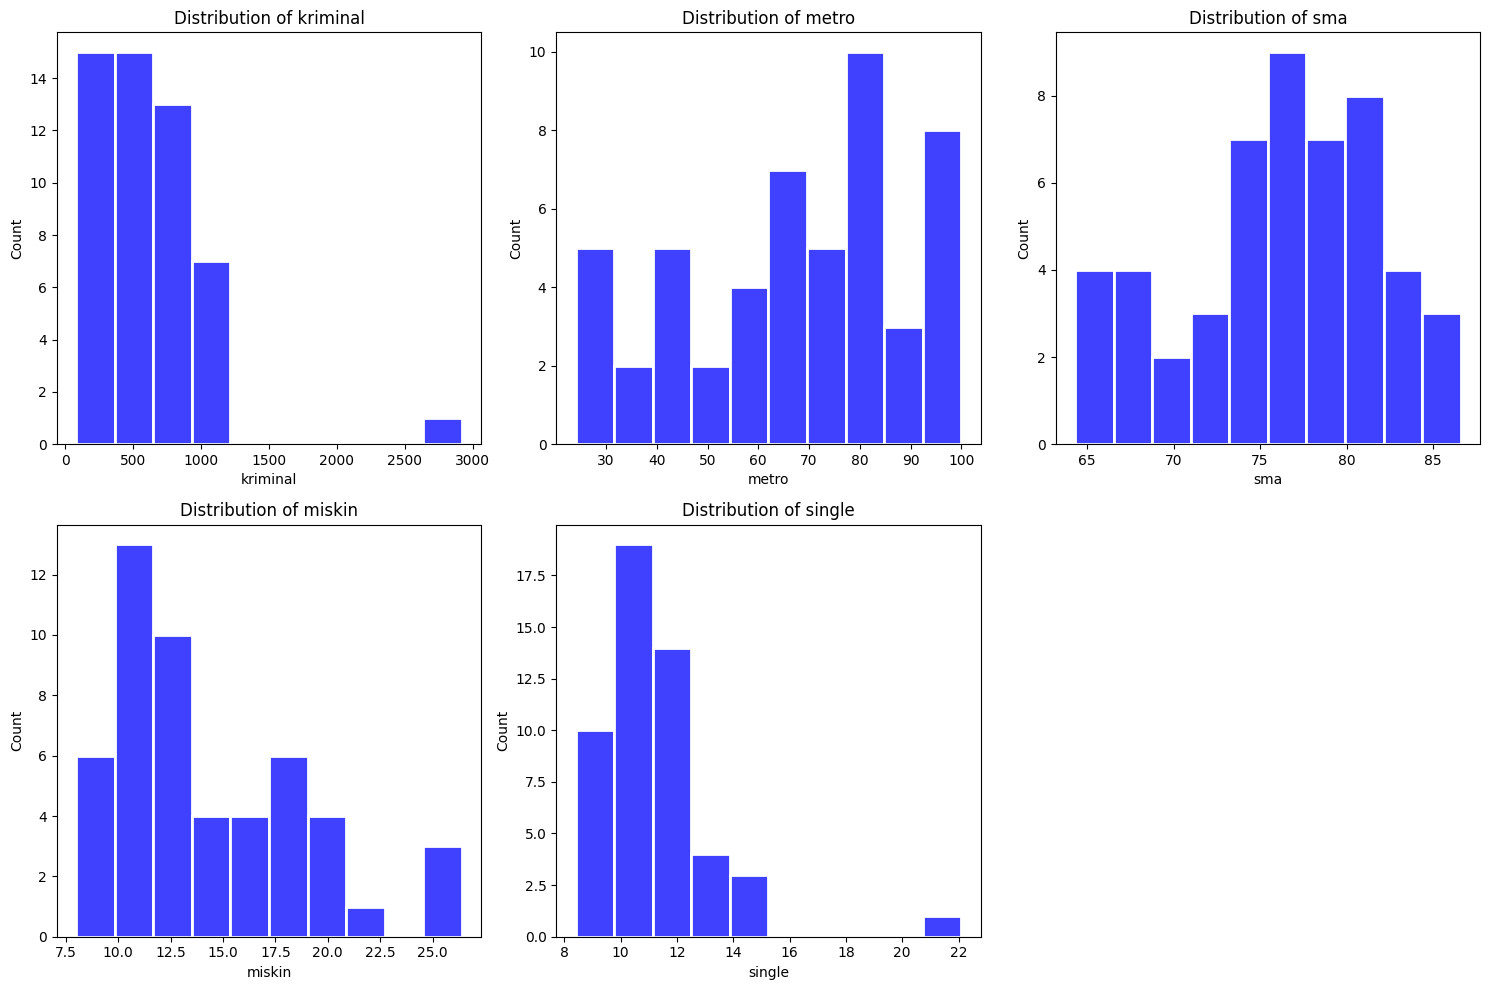

In [ ]:
# Histogram
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
kolom = ('kriminal','metro','sma','miskin','single')
axes = axes.flatten()
for i, col in enumerate(kolom):
  sns.histplot(df[col],
               color='blue', bins=10, edgecolor='white', linewidth=2,ax=axes[i])
  axes[i].set_title(f'Distribution of {col}')

for j in range(len(kolom), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

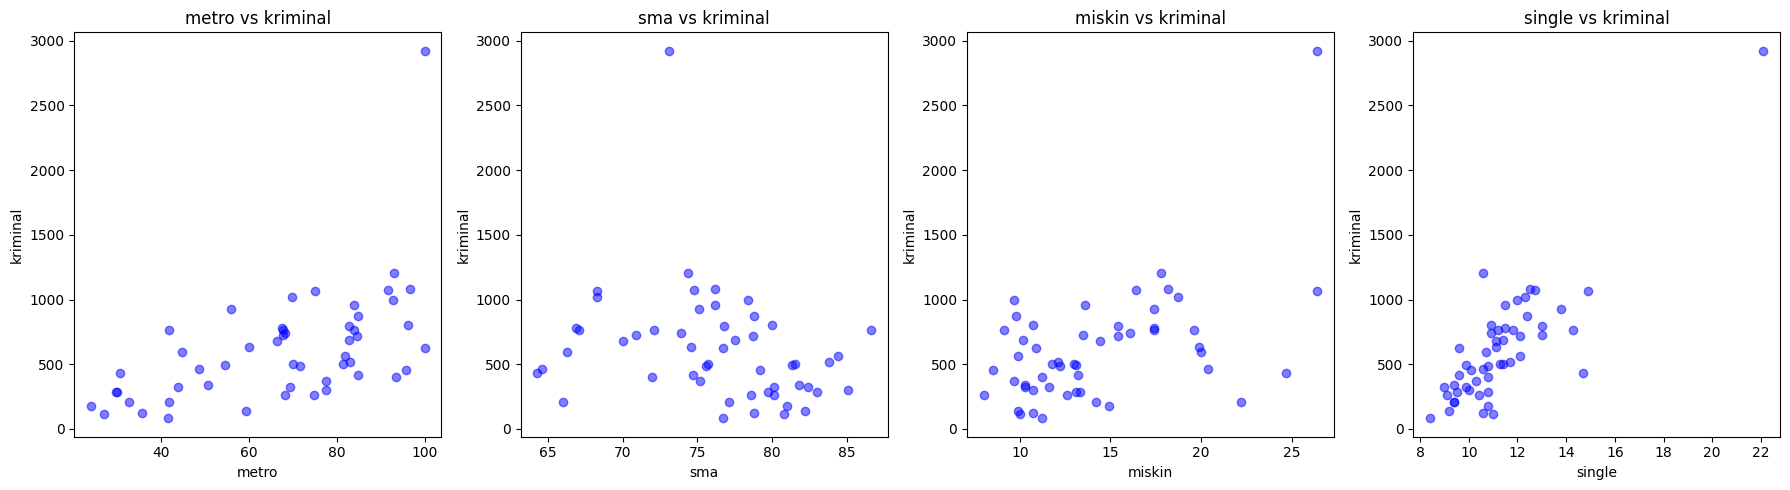

In [ ]:
# Scatter plot
plt.figure(figsize=(18, 5))

predictors = df.drop(columns=['kriminal']).columns
response = df['kriminal']

for i, col in enumerate(predictors):
    plt.subplot(1, len(predictors) , i+1)
    x = df[col]
    y = response
    plt.scatter(x, y, marker='o', color='blue', alpha=0.5)
    plt.title(f'{col} vs kriminal')
    plt.xlabel(col)
    plt.ylabel('kriminal')
    plt.tight_layout()

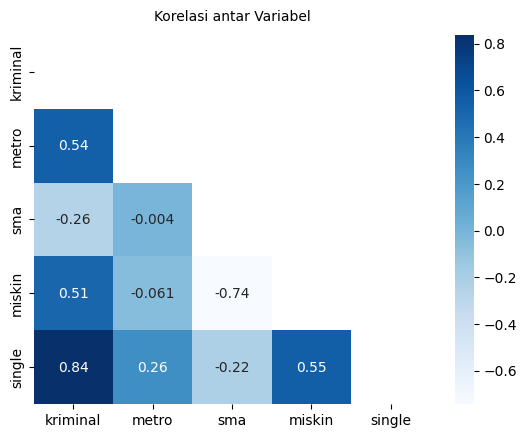

In [ ]:
# Heatmap
corr = df.corr()
sns.heatmap(corr, annot=True,cmap="Blues",mask = np.triu(np.ones_like(corr, dtype=bool)))
plt.title('Korelasi antar Variabel', fontsize=10, pad=10)
plt.show()

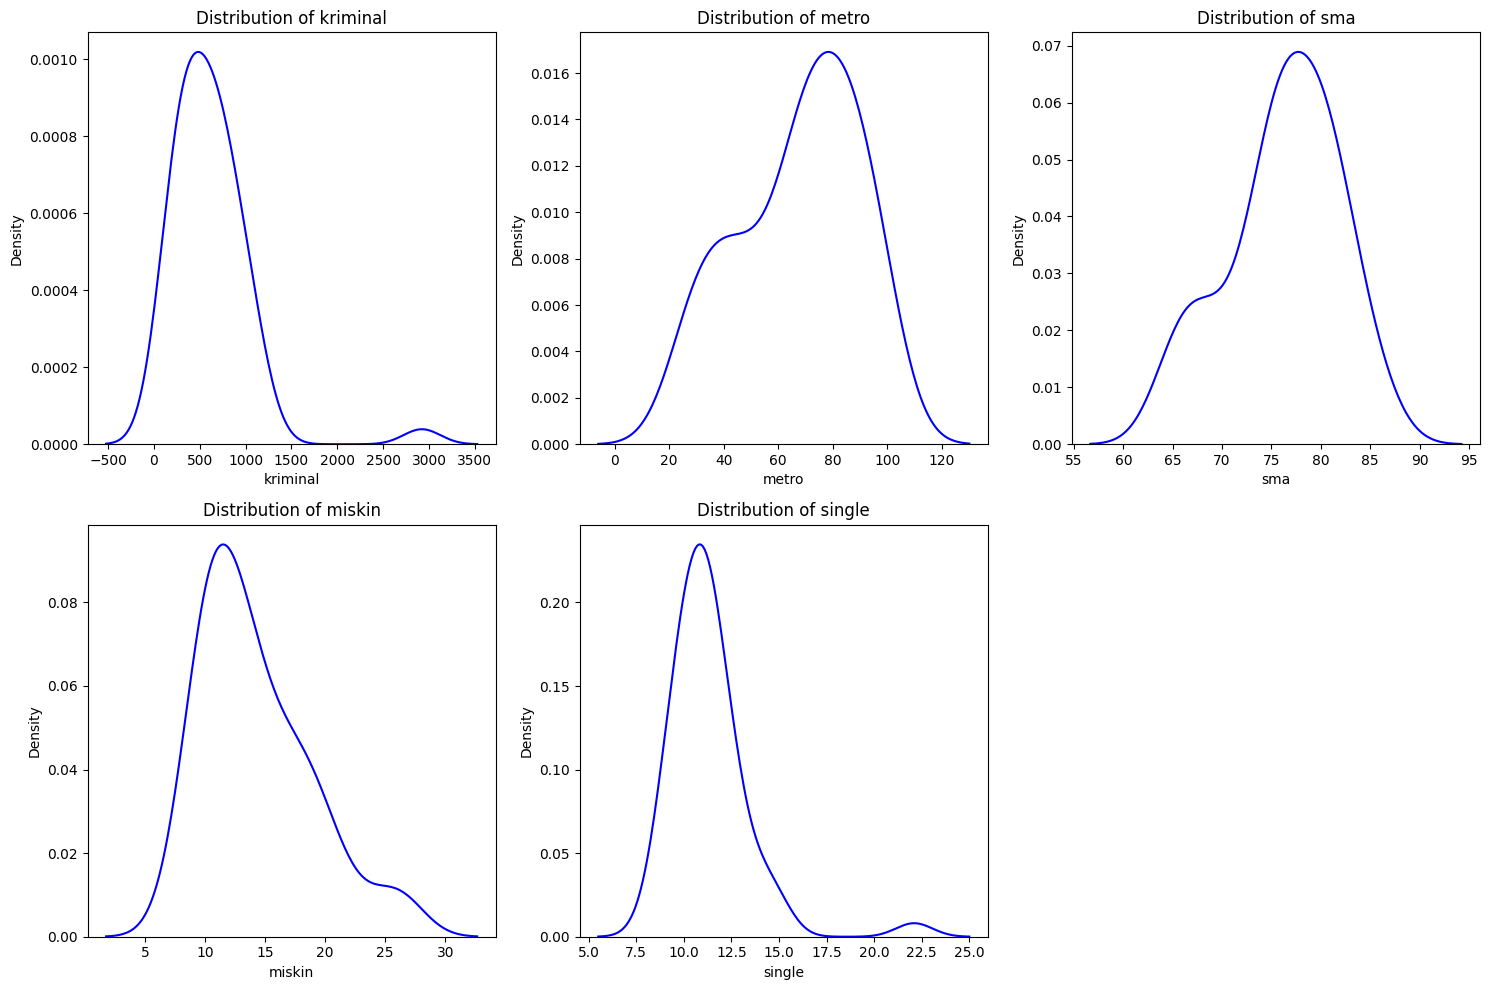

In [ ]:
# Density plot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
kolom = ('kriminal','metro','sma','miskin','single')
axes = axes.flatten()
for i, col in enumerate(kolom):
  sns.distplot(df[col], hist=False, kde=True,
               color = 'blue',ax=axes[i])
  axes[i].set_title(f'Distribution of {col}')

for j in range(len(kolom), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

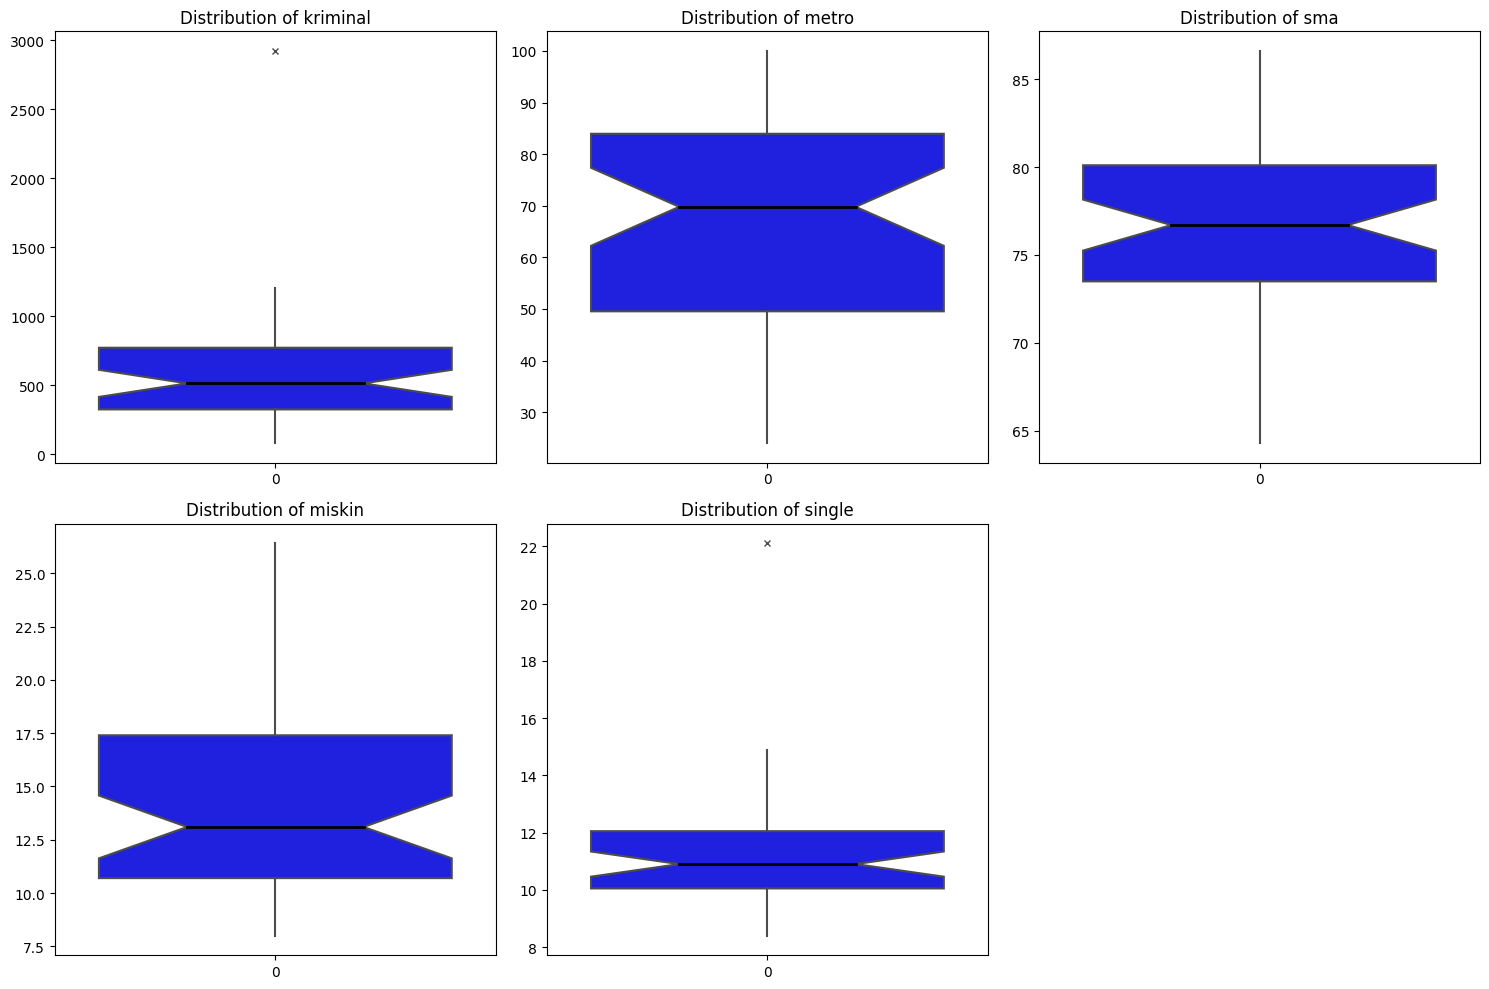

In [ ]:
# Boxplot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
kolom = ('kriminal','metro','sma','miskin','single')
axes = axes.flatten()
for i, col in enumerate(kolom):
  sns.boxplot(df[col],color='blue',ax=axes[i],notch=True, showcaps=False,
    flierprops={"marker": "x"},
    medianprops={"color": "black", "linewidth": 2})
  axes[i].set_title(f'Distribution of {col}')

for j in range(len(kolom), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# **Analisis Deskriptif**


In [ ]:
def statistika_deskriptif(data):
    # Mendapatkan hanya kolom-kolom numerik
    kolom_numerik = data.select_dtypes(include=[np.number])

    # Inisialisasi vektor kosong untuk menyimpan hasil perhitungan
    variables = kolom_numerik.columns
    means, medians, q1s, q3s, variances, sds, ranges, sums, mins, maxs = ([] for _ in range(10))

    # Loop untuk setiap variabel numerik
    for variable in variables:
        values = kolom_numerik[variable]

        # Hitung statistika deskriptif
        means.append(np.mean(values))
        medians.append(np.median(values))
        q1s.append(np.percentile(values, 25))
        q3s.append(np.percentile(values, 75))
        variances.append(np.var(values))
        sds.append(np.std(values))
        ranges.append(np.max(values) - np.min(values))
        sums.append(np.sum(values))
        mins.append(np.min(values))
        maxs.append(np.max(values))

    hasil = pd.DataFrame({
        'Variabel': variables,
        'Mean': means,
        'Median': medians,
        'Q1': q1s,
        'Q3': q3s,
        'Variance': variances,
        'SD': sds,
        'Range': ranges,
        'Sum': sums,
        'Min': mins,
        'Max': maxs
    })

    return hasil


In [ ]:
statistika_deskriptif(df)

,Variabel,Mean,Median,Q1,Q3,Variance,SD,Range,Sum,Min,Max
0,kriminal,612.843137,515.0,326.50,773.00,190754.406767,436.754401,2840.0,31255.0,82.0,2922.0
1,metro,67.390196,69.8,49.55,83.95,472.662453,21.740802,76.0,3436.9,24.0,100.0
2,sma,76.223529,76.7,73.50,80.10,30.658270,5.536991,22.3,3887.4,64.3,86.6
3,miskin,14.258824,13.1,10.70,17.40,20.603206,4.539076,18.4,727.2,8.0,26.4
4,single,11.325490,10.9,10.05,12.05,4.412488,2.100592,13.7,577.6,8.4,22.1


# **Analisis Regresi**

In [ ]:
#Membuat variabel sebelum dilakukan perhitungan model regresi
x = df.drop(columns=['kriminal'])
y = df['kriminal']

X = sm.add_constant(x)
print(X)

    const  metro   sma  miskin  single
0     1.0   41.8  86.6     9.1    14.3
1     1.0   67.4  66.9    17.4    11.5
2     1.0   44.7  66.3    20.0    10.7
3     1.0   84.7  78.7    15.4    12.1
4     1.0   96.7  76.2    18.2    12.5
5     1.0   81.8  84.4     9.9    12.1
6     1.0   95.7  79.2     8.5    10.1
7     1.0   82.7  77.5    10.2    11.4
8     1.0   93.0  74.4    17.8    10.6
9     1.0   67.7  70.9    13.5    13.0
10    1.0   74.7  80.1     8.0     9.1
11    1.0   43.8  80.1    10.3     9.0
12    1.0   30.0  79.7    13.1     9.5
13    1.0   84.0  76.2    13.6    11.5
14    1.0   71.6  75.6    12.2    10.8
15    1.0   54.6  81.3    13.1     9.9
16    1.0   48.5  64.6    20.4    10.6
17    1.0   75.0  68.3    26.4    14.9
18    1.0   96.2  80.0    10.7    10.9
19    1.0   92.8  78.4     9.7    12.0
20    1.0   35.7  78.8    10.7    10.6
21    1.0   82.7  76.8    15.4    13.0
22    1.0   69.3  82.4    11.6     9.9
23    1.0   68.3  73.9    16.1    10.9
24    1.0   30.7  64.3   

## Ordinary Least Squares Regression

In [ ]:
#OLS Model
result_ols = sm.OLS(y, x).fit()
# Melatih model
print(result_ols.summary())

y_pred = result_ols.predict(x)

# Menghitung RMSE
rmse_ols = np.sqrt(mean_squared_error(y, y_pred))

# Menampilkan RMSE
print("Root Mean Squared Error (RMSE):", rmse_ols)

                                 OLS Regression Results                                
Dep. Variable:               kriminal   R-squared (uncentered):                   0.935
Model:                            OLS   Adj. R-squared (uncentered):              0.930
Method:                 Least Squares   F-statistic:                              169.4
Date:                Tue, 02 Jan 2024   Prob (F-statistic):                    2.77e-27
Time:                        08:19:51   Log-Likelihood:                         -340.41
No. Observations:                  51   AIC:                                      688.8
Df Residuals:                      47   BIC:                                      696.5
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Persamaan ***OLS Regression*** dari output tersebut adalah:

kriminal = -2060.9260 + 8.0019 (metro) + 4.6349 (sma) + 22.9626 (miskin) + 128.3664 (single)

Keterangan:

- variabel dependen : kriminal (kejahatan kekerasan per 100.000 orang)
- variabel independen : metro (persentase penduduk yang tinggal di wilayah metropolitan), sma (persentase penduduk yang berpendidikan sekolah menengah atas ke atas), miskin (persentase penduduk yang hidup di bawah garis kemiskinan), dan single (persentase penduduk yang merupakan orang tua tunggal)

## Robust Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import RANSACRegressor

# Fitur robust regression dengan metode RANSAC
model_robust = RANSACRegressor(random_state=0)

# Melatih model pada set pelatihan
result_robust = model_robust.fit(X, y)

# Membuat prediksi pada set pengujian
y_pred_robust = model_robust.predict(X)

# Menampilkan koefisien dan intercept
print("Coefficients:", model_robust.estimator_.coef_)
print("Intercept:", model_robust.estimator_.intercept_)

# Menghitung dan menampilkan metrik R2
r2_robust = r2_score(y, y_pred_robust)
print("R^2 Score:", r2_robust)

# Menghitung adjusted R-squared
n = len(y)
k = X.shape[1]
adjusted_r2_robust = 1 - ((1 - r2_robust) * (n - 1) / (n - k - 1))

# Menampilkan adjusted R-squared
print("Adjusted R^2 Score:", adjusted_r2_robust)

# Menghitung dan menampilkan RMSE
rmse_robust = mean_squared_error(y, y_pred_robust, squared=False)
print("Root Mean Squared Error (RMSE):", rmse_robust)

Coefficients: [  0.           5.98413587  -9.59551515  16.59584867 153.50134155]
Intercept: -984.5609151591948
R^2 Score: 0.7908497997373205
Adjusted R^2 Score: 0.7676108885970228
Root Mean Squared Error (RMSE): 199.74063776865464


Persamaan ***Robust Regression*** dari output tersebut adalah:

kriminal = -984.5609 + 5.9841 (metro) - 9.5955(sma) + 16.5958 (miskin) + 153.5013 (single)

Keterangan:

- variabel dependen : kriminal (kejahatan kekerasan per 100.000 orang)
- variabel independen : metro (persentase penduduk yang tinggal di wilayah metropolitan), sma (persentase penduduk yang berpendidikan sekolah menengah atas ke atas), miskin (persentase penduduk yang hidup di bawah garis kemiskinan), dan single (persentase penduduk yang merupakan orang tua tunggal)

## Uji Signifikansi Parameter

### Uji Serentak

$H_{0}: \beta_{1} = \beta_{2} = \beta_{3} = \beta_{4} = 0$

$H_{1}$: minimal ada satu $\beta_{i}  \neq 0$, $i=1,2,3,4$

In [ ]:
df_simultan = pd.DataFrame({'F-hitung':[result_ols.fvalue],
                                  'p-value':[result_ols.f_pvalue],
                                  'alpha':[0.05]})

df_simultan['Kesimpulan'] = df_simultan['p-value'].gt((df_simultan['alpha']))
df_simultan['Kesimpulan'] = df_simultan['Kesimpulan'].replace({True:'Gagal Tolak H0',
                                                                           False:'Tolak H0'})

df_simultan

,F-hitung,p-value,alpha,Kesimpulan
0,60.897183,8.529875e-18,0.05,Tolak H0


Kesimpulan:

Tolak H0, variabel independen x berpengaruh terhadap variabel dependen y

### Uji Parsial

Untuk $\beta_{1}$

$H_{0}: \beta_{1} = 0$

$H_{1}: \beta_{1} \neq 0$

Untuk $\beta_{2}$

$H_{0}: \beta_{2} = 0$

$H_{1}: \beta_{2} \neq 0$

Untuk $\beta_{3}$

$H_{0}: \beta_{3} = 0$

$H_{1}: \beta_{3} \neq 0$

Untuk $\beta_{4}$

$H_{0}: \beta_{4} = 0$

$H_{1}: \beta_{4} \neq 0$

In [ ]:
df_partial = pd.DataFrame()
df_partial['Variabel'] = result_ols.tvalues.index
df_partial['t-hitung'] = result_ols.tvalues.values
df_partial['p-value'] = result_ols.pvalues.values
df_partial['alpha'] = 0.05

df_partial['Kesimpulan'] = df_partial['p-value'].gt((df_partial['alpha']))
df_partial['Kesimpulan'] = df_partial['Kesimpulan'].replace({True:'Gagal Tolak H0',
                                                                           False:'Tolak H0'})

df_partial

,Variabel,t-hitung,p-value,alpha,Kesimpulan
0,const,-3.125044,3.076077e-03,0.05,Tolak H0
1,metro,6.183279,1.537333e-07,0.05,Tolak H0
2,sma,0.614020,5.422272e-01,0.05,Gagal Tolak H0
3,miskin,2.071864,4.391182e-02,0.05,Tolak H0
4,single,7.578474,1.245130e-09,0.05,Tolak H0


Kesimpulan:

- metro :  Mengalami Tolak H0, yang artinya persentase penduduk yang tinggal di wilayah metropolitan berpengaruh terhadap tindak kriminal yang ada

- sma : Mengalami Gagal Tolak H0, yang artinya persentase penduduk yang masih sma tidak berpengaruh terhadap tindak kriminal yang ada

- miskin : Mengalami Gagal Tolak H0, yang artinya persentase penduduk yang hidup di bawah garis kemiskinan tidak berpengaruh terhadap tindak kriminal yang ada

- single : Mengalami Tolak H0, yang artinya persentase penduduk yang merupakan orang tua tunggal berpengaruh terhadap tindak kriminal yang ada

# **Model Regresi (R^2 dan R^2 Adjusted)**

## Ordinary Least Squares Regression

In [ ]:
df_model_evaluation = pd.DataFrame({'Model':['Ordinary Least Squares Regression'],
                                    'R-Square':[result_ols.rsquared],
                                    'Adjusted R-Square':[result_ols.rsquared_adj],
                                    'RMSE':[rmse_ols]})

df_model_evaluation

,Model,R-Square,Adjusted R-Square,RMSE
0,Ordinary Least Squares Regression,0.841154,0.827341,174.07058


Berikut adalah interpretasi dari output tersebut:
- Model ***OLS Regression*** memiliki R-Square sebesar 0.841, yang menunjukkan bahwa model mampu menjelaskan sekitar 84,1% dari variasi dalam variabel target (kriminal).

- Model ***OLS Regression*** memiliki Adjusted R-Square sebesar 0.827, yang menunjukkan bahwa model mampu menjelaskan sekitar 82,7% dari variasi dalam variabel target setelah mempertimbangkan jumlah variabel independen yang digunakan dalam model.

- Model ***OLS Regression*** memiliki RMSE sekitar 174 menunjukkan bahwa rata-rata kesalahan prediksi model ini sekitar 174 unit dari nilai aktual.

Secara keseluruhan, kedua model menunjukkan kinerja yang baik dalam menjelaskan hubungan antara variabel independen dengan variabel dependen.


## Robust Regression

In [ ]:
df_model_evaluation = pd.DataFrame({'Model':['Robust Regression'],
                                    'R-Square':[r2_robust],
                                    'Adjusted R-Square':[adjusted_r2_robust],
                                    'RMSE':[rmse_robust]})

df_model_evaluation

,Model,R-Square,Adjusted R-Square,RMSE
0,Robust Regression,0.79085,0.767611,199.740638


Berikut adalah interpretasi dari output tersebut:
- Model ***Robust Regression*** memiliki R-Square sebesar 0.791, yang menunjukkan bahwa model mampu menjelaskan sekitar 79,1% dari variasi dalam variabel target (kriminal).

- Model ***Robust Regression*** memiliki Adjusted R-Square sebesar 0.799, yang menunjukkan bahwa model mampu menjelaskan sekitar 79,9% dari variasi dalam variabel target setelah mempertimbangkan jumlah variabel independen yang digunakan dalam model.

- Model ***Robust Regression*** memiliki RMSE sekitar 200 menunjukkan bahwa rata-rata kesalahan prediksi model ini sekitar 200 unit dari nilai aktual.

Secara keseluruhan, kedua model menunjukkan kinerja yang baik dalam menjelaskan hubungan antara variabel independen dengan variabel dependen.


# **Uji Asumsi Error**

## Normalitas

In [ ]:
from scipy.stats import kstest
residuals = result_ols.resid
# uji normalitas dengan kolmogorov-smirnov test
ks_statistic, ks_p_value = kstest(residuals, 'norm', args=(np.mean(residuals), np.std(residuals)))

print('Statistic KS:', ks_statistic)
print('P-value:', ks_p_value)

# interpret
alpha = 0.05
if ks_p_value > alpha:
	print('Data Berdistribusi Normal (Gagal Tolak H0)')
else:
	print('Data Tidak Berdistribusi Normal (Tolak H0)')

Statistic KS: 0.07322782884154155
P-value: 0.928697393742446
Data Berdistribusi Normal (Gagal Tolak H0)


<Axes: ylabel='Density'>

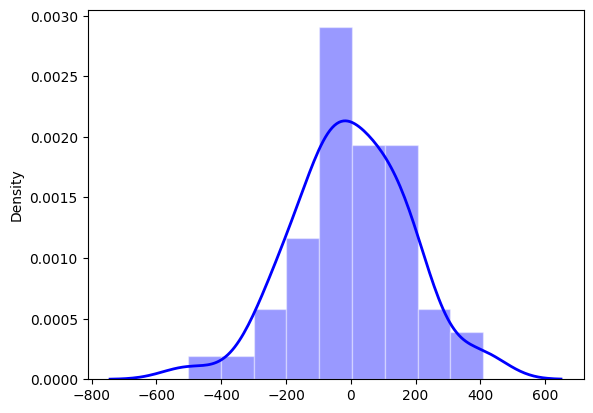

In [ ]:
# Visualisasi
sns.distplot(residuals, hist=True, kde=True,
             color = 'blue',
             hist_kws={'edgecolor':'white'},
             kde_kws={'linewidth': 2})

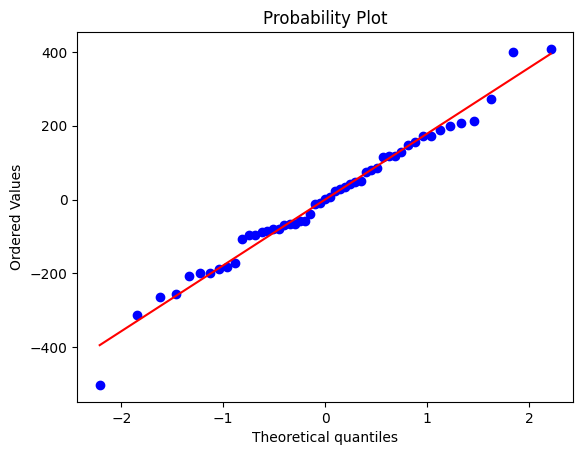

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming you have 'residuals' defined

# Create a Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)

# Get the current axes
ax = plt.gca()

# Get the line from the Q-Q plot
line = ax.get_lines()[0]

# Change the color of the markers
line.set_markerfacecolor('blue')
line.set_markeredgecolor('blue')

plt.show()

## Autokorelasi

In [ ]:
import pandas as pd
import statsmodels.api as sm

df_autokorelasi = pd.read_excel("/content/7_kejahatan.xlsx")

# Inisiasi Variabel
y_autokorelasi = df_autokorelasi['kriminal']
X_autokorelasi = df_autokorelasi[['metro', 'sma', 'miskin', 'single']]
X_autokorelasi = sm.add_constant(X_autokorelasi)

# Model Regresi
model_autokorelasi = sm.OLS(y_autokorelasi, X_autokorelasi).fit()

# Residuals
residuals_autokorelasi = model_autokorelasi.resid


In [ ]:
# Nilai Durbin-Watson
dw_test_autokorelasi = sm.stats.stattools.durbin_watson(residuals_autokorelasi)
print(f'Hasil hitung Statistik Durbin-Watson: {dw_test_autokorelasi}')

# Batas
N_autokorelasi = len(residuals_autokorelasi)
k_autokorelasi = X_autokorelasi.shape[1] - 1  # Jumlah variabel independen

dU_autokorelasi = 1.7218
dL_autokorelasi = 1.3855

print(f'dU = {dU_autokorelasi}')
print(f'dL = {dL_autokorelasi}')
print()

# Interpretasi
if dw_test_autokorelasi < dL_autokorelasi:
    print(f'Terdapat indikasi autokorelasi positif. DW < dL ({dw_test_autokorelasi} < {dL_autokorelasi}). Perlu diteliti lebih lanjut untuk autokorelasi positif.')
elif dL_autokorelasi <= dw_test_autokorelasi <= dU_autokorelasi:
    print('Tidak dapat mengambil keputusan. dL <= DW <= dU')
    print(f'{dL_autokorelasi} <= {dw_test_autokorelasi} <= {dU_autokorelasi}')
elif dw_test_autokorelasi > 4 - dU_autokorelasi:
    print(f'Terdapat indikasi autokorelasi negatif. DW > 4 - dU ({dw_test_autokorelasi} > {4 - dU_autokorelasi}). Perlu diteliti lebih lanjut untuk autokorelasi negatif.')
else:
    print('Hasil tidak diketahui. Mohon periksa statistik Durbin-Watson dan nilai kritis.')


Hasil hitung Statistik Durbin-Watson: 1.6516280405697554
dU = 1.7218
dL = 1.3855

Tidak dapat mengambil keputusan. dL <= DW <= dU
1.3855 <= 1.6516280405697554 <= 1.7218


## Heterokedastisitas

In [ ]:
# Uji statistik
# prediksi
pred_y = result_ols.predict(X)

# simpan residu
resid = y - pred_y

# absolut residu
y_abs_resid = np.abs(resid)

result_glejser = sm.OLS(y_abs_resid, x).fit()

df_glejser = pd.DataFrame(result_glejser.pvalues, columns = ['p-value'])
df_glejser['Keputusan'] = df_glejser['p-value'].gt(0.05)
df_glejser['Keputusan'] = df_glejser['Keputusan'].replace({True:'Gagal Tolak H0',
                                                           False:'Tolak H0'})
df_glejser

,p-value,Keputusan
metro,0.751169,Gagal Tolak H0
sma,0.290357,Gagal Tolak H0
miskin,0.217644,Gagal Tolak H0
single,0.207491,Gagal Tolak H0


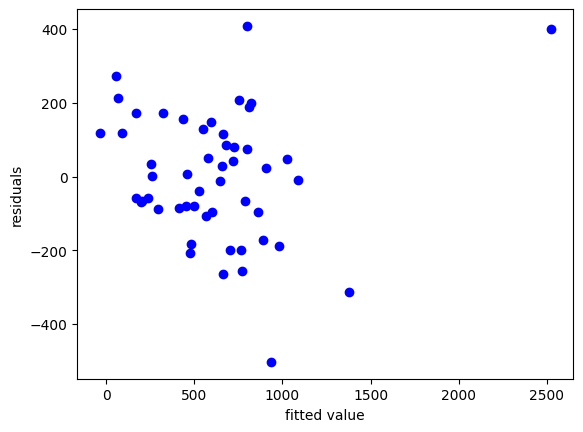

In [ ]:
# Visualisasi
plt.scatter(x=result_ols.fittedvalues, y=residuals, color = 'blue')
plt.xlabel('fitted value', fontsize=10)
plt.ylabel('residuals', fontsize=10)
plt.show()

## Multikolinearitas

In [ ]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data['keputusan'] = vif_data["VIF"].gt(10)
vif_data['keputusan'] = vif_data['keputusan'].replace({True:'Tolak H0',
                                                                           False:' Gagal Tolak H0'})

vif_data

,feature,VIF,keputusan
0,const,660.266956,Tolak H0
1,metro,1.201715,Gagal Tolak H0
2,sma,2.652013,Gagal Tolak H0
3,miskin,3.842047,Gagal Tolak H0
4,single,1.921894,Gagal Tolak H0
